In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Загрузка данных (предположим, что файл называется 'data.csv' и разделитель - табуляция)
# df = pd.read_csv('kaggle_income.csv', sep='\t', header=None, names=['all_data'])
df = pd.read_csv('kaggle_income.csv', sep='\t', header=None, names=['all_data'], encoding='latin-1')

In [ ]:
Разделение данных на отдельные колонки, изначально они все в одной


In [20]:
columns = [
    'id', 'State_Code', 'State_Name', 'State_ab', 'County', 'City',
    'Place', 'Type', 'Primary', 'Zip_Code', 'Area_Code', 'ALand',
    'AWater', 'Lat', 'Lon', 'Mean', 'Median', 'Stdev', 'sum_w'
]

# Разделение данных и создание новых колонок
df[columns] = df['all_data'].str.split(',', expand=True)

# Удаление исходной колонки
df.drop('all_data', axis=1, inplace=True)

In [22]:
# Конвертация числовых колонок
numeric_cols = ['ALand', 'AWater', 'Lat', 'Lon', 'Mean', 'Median', 'Stdev', 'sum_w']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

Пропущенные значения:
id            0
State_Code    0
State_Name    0
State_ab      0
County        0
City          0
Place         0
Type          0
Primary       0
Zip_Code      0
Area_Code     0
ALand         1
AWater        1
Lat           1
Lon           1
Mean          1
Median        1
Stdev         1
sum_w         1
dtype: int64

Основные статистики:
              ALand        AWater           Lat           Lon           Mean  \
count  3.252600e+04  3.252600e+04  32526.000000  32526.000000   32526.000000   
mean   1.165893e+08  6.952054e+06     37.731983    -91.303844   66703.986042   
std    1.280894e+09  2.092093e+08      5.579450     16.227588   30451.194599   
min    0.000000e+00  0.000000e+00     17.929085   -175.860041       0.000000   
25%    1.906991e+06  0.000000e+00     34.013469    -97.664034   46015.500000   
50%    5.022976e+06  2.703350e+04     38.925588    -87.139280   60738.000000   
75%    3.090984e+07  5.082078e+05     41.495793    -79.852969   82223.500000   

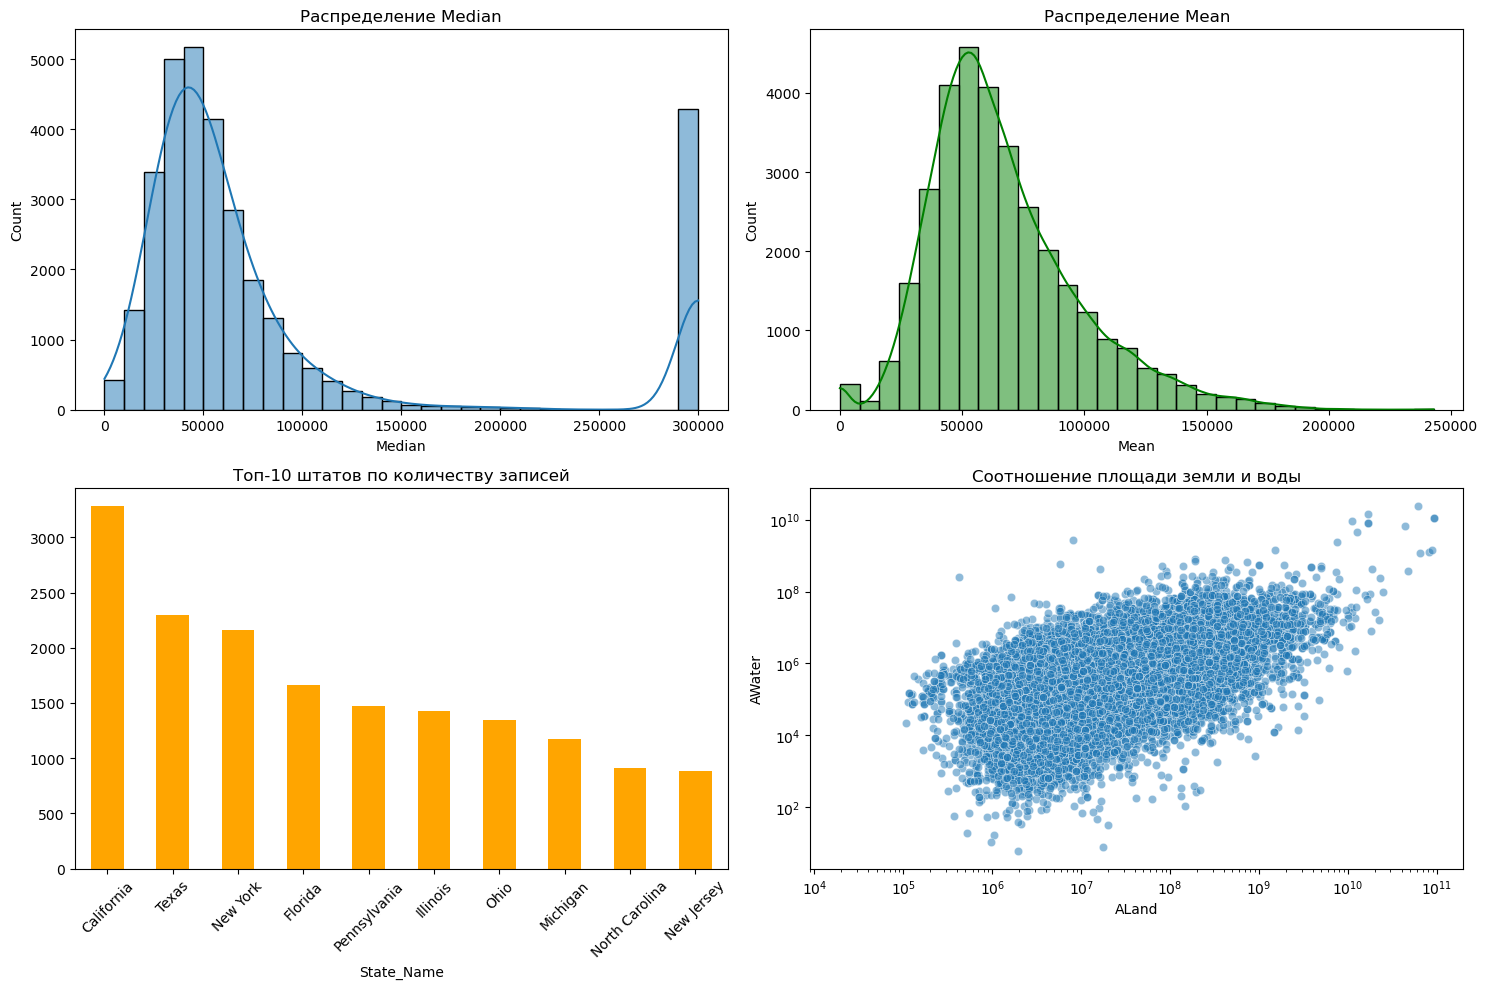

In [24]:
# Анализ пропущенных значений
print("Пропущенные значения:")
print(df.isnull().sum())

# Основные статистики
print("\nОсновные статистики:")
print(df.describe())

# Визуализация
plt.figure(figsize=(15, 10))

# Гистограмма для Median
plt.subplot(2, 2, 1)
sns.histplot(df['Median'], bins=30, kde=True)
plt.title('Распределение Median')

# Гистограмма для Mean
plt.subplot(2, 2, 2)
sns.histplot(df['Mean'], bins=30, kde=True, color='green')
plt.title('Распределение Mean')

# Распределение по штатам (топ-10)
plt.subplot(2, 2, 3)
df['State_Name'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Топ-10 штатов по количеству записей')
plt.xticks(rotation=45)

# Соотношение земли и воды
plt.subplot(2, 2, 4)
sns.scatterplot(x='ALand', y='AWater', data=df, alpha=0.5)
plt.title('Соотношение площади земли и воды')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()

In [26]:
# Основные статистики
print("\nОсновные статистики:")
print(df.describe())


Основные статистики:
              ALand        AWater           Lat           Lon           Mean  \
count  3.252600e+04  3.252600e+04  32526.000000  32526.000000   32526.000000   
mean   1.165893e+08  6.952054e+06     37.731983    -91.303844   66703.986042   
std    1.280894e+09  2.092093e+08      5.579450     16.227588   30451.194599   
min    0.000000e+00  0.000000e+00     17.929085   -175.860041       0.000000   
25%    1.906991e+06  0.000000e+00     34.013469    -97.664034   46015.500000   
50%    5.022976e+06  2.703350e+04     38.925588    -87.139280   60738.000000   
75%    3.090984e+07  5.082078e+05     41.495793    -79.852969   82223.500000   
max    9.163267e+10  2.453228e+10     71.253500    -65.500823  242857.000000   

              Median          Stdev          sum_w  
count   32526.000000   32526.000000   32526.000000  
mean    85452.938818   47273.695321     576.910273  
std     87810.895132   16555.486882    3911.006939  
min         0.000000       0.000000       0.0

In [38]:
# Визуализация
plt.figure(figsize=(25, 20))

<Figure size 2500x2000 with 0 Axes>

<Figure size 2500x2000 with 0 Axes>

Text(0.5, 1.0, 'Распределение Median')

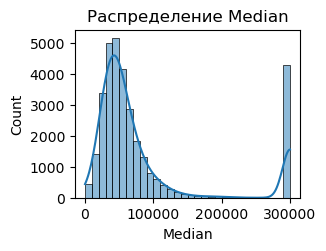

In [30]:
# Гистограмма для Median
plt.subplot(2, 2, 1)
sns.histplot(df['Median'], bins=30, kde=True)
plt.title('Распределение Median')

Text(0.5, 1.0, 'Распределение Mean')

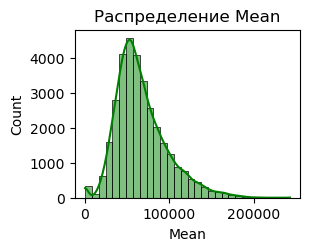

In [32]:

# Гистограмма для Mean
plt.subplot(2, 2, 2)
sns.histplot(df['Mean'], bins=30, kde=True, color='green')
plt.title('Распределение Mean')



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'California'),
  Text(1, 0, 'Texas'),
  Text(2, 0, 'New York'),
  Text(3, 0, 'Florida'),
  Text(4, 0, 'Pennsylvania'),
  Text(5, 0, 'Illinois'),
  Text(6, 0, 'Ohio'),
  Text(7, 0, 'Michigan'),
  Text(8, 0, 'North Carolina'),
  Text(9, 0, 'New Jersey')])

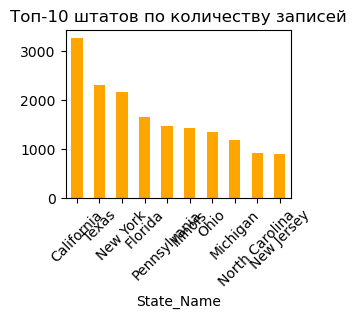

In [40]:
# Распределение по штатам (топ-10)
plt.subplot(2, 2, 3)
df['State_Name'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Топ-10 штатов по количеству записей')
plt.xticks(rotation=45)



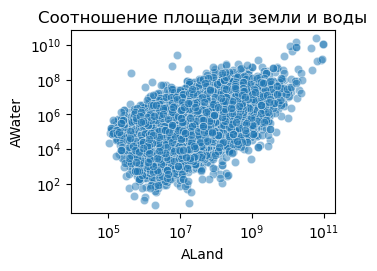

In [36]:
# Соотношение земли и воды
plt.subplot(2, 2, 4)
sns.scatterplot(x='ALand', y='AWater', data=df, alpha=0.5)
plt.title('Соотношение площади земли и воды')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()

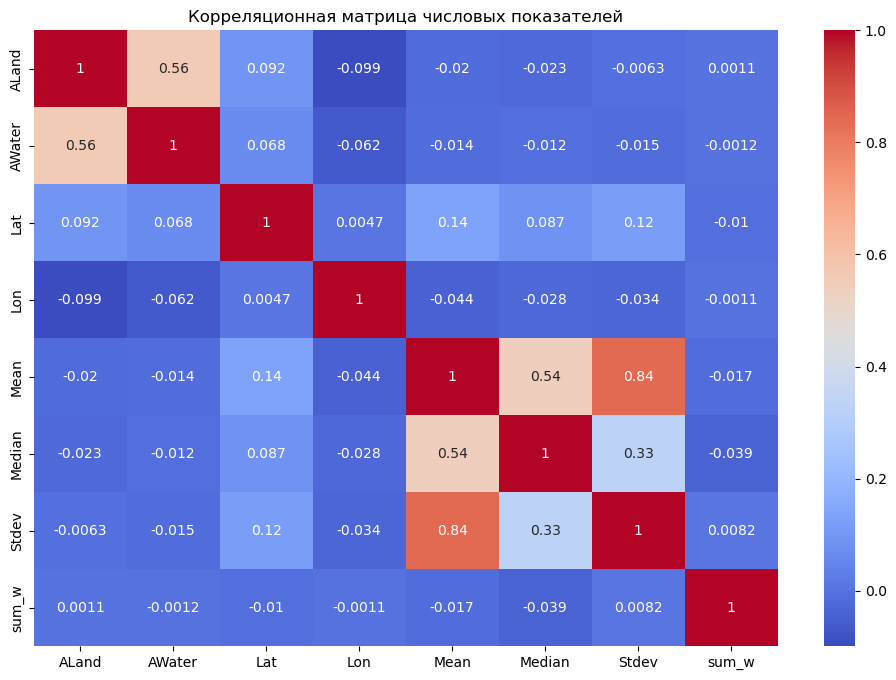

In [42]:
# Дополнительный анализ
# Корреляционная матрица
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых показателей')
plt.show()

In [44]:
print(corr_matrix)


           ALand    AWater       Lat       Lon      Mean    Median     Stdev  \
ALand   1.000000  0.558647  0.092124 -0.098971 -0.020274 -0.023317 -0.006316   
AWater  0.558647  1.000000  0.067765 -0.061819 -0.014467 -0.012340 -0.014532   
Lat     0.092124  0.067765  1.000000  0.004664  0.136266  0.086964  0.117045   
Lon    -0.098971 -0.061819  0.004664  1.000000 -0.043835 -0.028488 -0.033599   
Mean   -0.020274 -0.014467  0.136266 -0.043835  1.000000  0.541713  0.844316   
Median -0.023317 -0.012340  0.086964 -0.028488  0.541713  1.000000  0.329265   
Stdev  -0.006316 -0.014532  0.117045 -0.033599  0.844316  0.329265  1.000000   
sum_w   0.001136 -0.001224 -0.010330 -0.001127 -0.016502 -0.038895  0.008166   

           sum_w  
ALand   0.001136  
AWater -0.001224  
Lat    -0.010330  
Lon    -0.001127  
Mean   -0.016502  
Median -0.038895  
Stdev   0.008166  
sum_w   1.000000  
